# Content

>[Content](#scrollTo=u58jnk81yfq1)

>[Task](#scrollTo=S5V46a4UdmDY)

>[Additional links](#scrollTo=7I63l6uB1nzn)

>[Libraries and Functions](#scrollTo=zUMgqpvieruX)

>>[Install libraries](#scrollTo=qsjaild3ez6D)

>>[Import libraries](#scrollTo=4SwM2xyqgTYY)

>>[For NLTK](#scrollTo=sIE5DyYhlV9J)

>>[Additional functions](#scrollTo=IPoh3zdVmO-k)

>[About data](#scrollTo=ChWjKThlm4uZ)

>>[Review data](#scrollTo=wfFhID0Enfmt)

>>[Clean data](#scrollTo=FsYk6KYb9xGW)

>>[Save clean data](#scrollTo=RHwGX9DrGscX)

>>[Load clean data](#scrollTo=1eyOlcvHHA6u)

>>[Remove NaN values](#scrollTo=juDJMJ3r4X4v)

>>[Data to vectors](#scrollTo=8pn6Gc_voqyq)

>[Model](#scrollTo=ER6GEUx24i4q)

>>[Create dataloader](#scrollTo=aEhxWRhq4gs6)

>>[Create model](#scrollTo=uPq-LutM4rL4)

>>>[Optimizer & Loss](#scrollTo=dQvT_BYM5G0Y)

>>[Learn RNN model](#scrollTo=QqpFLtRZ1P5A)

>>[Visualisation results](#scrollTo=85nTjpPkDRte)

>>[Save model](#scrollTo=9ibBsq-aoZwv)

>>[Load model](#scrollTo=MyTVGeZBoe7q)

>>[Learn CNN model](#scrollTo=Ak5_JLTzVNhB)

>>[Visualisation results](#scrollTo=OpcSu7B9pNw8)

>>[Save model](#scrollTo=8EIH_PiUwaDZ)

>>[Load model](#scrollTo=C6oiabLTvQPh)

>[Conclusion](#scrollTo=pibdZn6swpK1)



# Task

Выяснить какая архитектура больше подходит для задачи сантимент анализа
1. построить свёрточные архитектуры
2. построить различные архитектуры с RNN
3. построить совместные архитектуры CNN -> RNN  и (RNN -> CNN)
4. сдлать выводы что получилось лучше


# Additional links

* [Notebook_1](https://colab.research.google.com/drive/1-6J1hSuhOoySpNFEbMRWdz5Yz99Y7Wti?usp=drive_link)

* [Notebook_2](https://colab.research.google.com/drive/1c3CN3kBfnAuI7XSUS2Uw-Zl6zjJCgvpZ?usp=drive_link)

* Regular expressions [one](https://habr.com/ru/articles/349860/) [two](https://tproger.ru/translations/regular-expression-python) [three](https://docs.python.org/3/library/re.html#)

# Libraries and Functions

## Install libraries

In [1]:
!pip install pymorphy2 clean-text dill langid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 32.7 MB/s eta 0:00:00
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=ad5bdb221f764d980724b5c3f62d9758ac39bf1f91d7f8dc182e6fec88ba18a5
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=23ad429f03ac838e2f3398f698895f265e27316c7d668172c884fc

## Import libraries

In [2]:
import os
import shutil
import time
import re
from google.colab import drive, files
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()
import dill
from pymorphy2 import MorphAnalyzer
from cleantext import clean
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools
import nltk
from nltk.corpus import stopwords
import langid
import emoji
import matplotlib.pyplot as plt

## For NLTK

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_ru')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('names')
nltk.download('tagsets')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

## Additional functions

In [259]:
def MDir(dir_name):
    """Make a new folder"""
    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    os.makedirs(dir_name)


def Upload(dir_name):
    """Upload files from PC to work dir"""
    f = files.upload()
    for fl in list(f.keys()):
        shutil.move('/content/' + fl, dir_name + fl)


def save_model_dill(path, model_name):
    with open(path, "wb") as mod:
        dill.dump(model_name, mod)


def load_model_dill(path):
    with open(path, "rb") as mod1:
        model_name = dill.load(mod1)
    return model_name


def save_model_pkl(path, model_name):
    with open(path, "wb") as mod:
        pickle.dump(model_name, mod)


def load_model_pkl(path):
    with open(path, "rb") as mod1:
        model_name = pickle.load(mod1)
    return model_name


class CleanText(BaseEstimator, TransformerMixin):

    """Cleaning text from regular characters in column
    key: str - name of column default:None
        If key = None then X in transform must be str
    stp_wrd: str - english, russian, ... default:english
    like_list: bool - True|False default:False
        If True then return text as list [word, word, ..., word], False return str,
        default False
    my_fun: Any default:None
    return: pd.Series -> X[key]

    You shoul to import:
        >>> pip install pymorphy2
        >>> pip install clean-text
        import re
        import pandas as pd
        from tqdm import tqdm
        from pymorphy2 import MorphAnalyzer
        from sklearn.base import BaseEstimator, TransformerMixin
        from cleantext import clean
        imort emoji
        from nltk.corpus import stopwords
        nltk.download('stopwords')"""

    def __init__(self, key:str=None, stp_wrd:str=None, my_fun=None, like_list:bool = False):
        self.key = key
        if stp_wrd == None:
            self.stp_wrd = "english"
        else:
            self.stp_wrd = stp_wrd
        self.sw = stopwords.words(self.stp_wrd)
        self.morpher = MorphAnalyzer()
        self.like_list = like_list
        self.my_fun = my_fun


    def clean_text(self, text:str) -> str:

        """Clean text"""

        if not isinstance(text, str):
            text = str(text)

        text = text.lower()
        text = text.strip('\n').strip('\r').strip('\t')

        if self.my_fun:
            text = self.my_fun(text)
        else:
            pass

        if self.stp_wrd == 'russian':
            text = re.sub(r'https?://\S+|www\.\S+', "электронныйадресс", text)
        else:
            text = re.sub(r'https?://\S+|www\.\S+', "weblinks", text)

        text = re.sub("\s\r\n\|-\s\r\n|\r\n", '', str(text))
        text = emoji.replace_emoji(text, '')
        text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•·&()]|[+=]|[[]|[]]|[/]", '', text)
        text = re.sub("\s\w\s", " ", text)
        text = re.sub(r"\r\n\t|\n|\\s|\r\t|\\n", ' ', text)
        text = re.sub(r'[\xad]|[\s+]', ' ', text.strip())
        text = re.sub('\n', ' ', text)
        text = [self.morpher.parse(word)[0].normal_form for word in text.split() if word not in self.sw]
        if self.like_list:
            return text
        else:
            text = " ".join(text)
            return text

    def get_feature_names_out(self, feature_names_out=None):
        if feature_names_out != None:
            return feature_names_out
        else:
            return [self.key]

    def fit(self, X, y=None):
        return self

    def transform(self, X) -> pd.Series:
        tqdm.pandas()
        X[self.key] = X[self.key].progress_apply(lambda x: self.clean_text(x))
        return X[self.key]


class MyTextData(Dataset):
    def __init__(self, data, target, transform=None):
        self.data = torch.from_numpy(data).long()
        self.target = torch.tensor(target).long()
        self.transform = transform

    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.target[idx]

        if self.transform:
            x = self.transform(x)

        return x, y

    def __len__(self):
        return len(self.data)


class Preprocessing_data():

    """Cleaning text from regular characters and
    transformations text to sequence
    *X - X_train, X_val, X_test
    cln_txt_key : str - column name
    tfidf_params : dict - Params for TfidfVectorizer"""

    def __init__(self, *X, key:str = None, tfidf_params:dict = None,
                 stop_w = None, myfun = None, ret_lst:bool = False):
        self.tfidf = TfidfVectorizer(**tfidf_params)
        self.key = key
        self.cln_txt = CleanText(key=self.key, stp_wrd=stop_w, my_fun=myfun, like_list=ret_lst)
        self.X = list(X)
        len_x = len(self.X)
        pad = [[None]] * (3-len_x)
        self.X = self.X[-len_x:] + pad
        self.X_train, self.X_val, self.X_test = self.X

    def data_preprocessing(self, clntxt = True):
        if clntxt:
            self.X_train = self.cln_txt.transform(self.X_train)
            self.X_val = self.cln_txt.transform(self.X_val)
            self.X_test = self.cln_txt.transform(self.X_test)
            self.vocab = self.tfidf.fit(self.X_train).vocabulary_
        else:
            self.X_train = self.X_train[self.key]
            self.X_val = self.X_val[self.key]
            self.X_test = self.X_test[self.key]
            self.vocab = self.tfidf.fit(self.X_train).vocabulary_
        return self.vocab

    def text_to_sequence(self, text, maxlen) -> list:
        result = []
        tokeniz = self.tfidf.build_tokenizer()
        tokens_list = tokeniz(text)
        for word in tokens_list:
            if word in self.vocab:
                result.append(self.vocab[word])

        padding = [0] * (maxlen-len(result))
        return result[-maxlen:] + padding

    def results(self, max_len:int=25) -> np.array:
        x_train = np.asarray([self.text_to_sequence(text, max_len) for text in self.X_train])
        x_val = np.asarray([self.text_to_sequence(text, max_len) for text in self.X_val])
        x_test = np.asarray([self.text_to_sequence(text, max_len) for text in self.X_test])
        return x_train, x_val, x_test


class RNN_Text_model(nn.Module):
    def __init__(self, vocab_size, embedding_out, out_chanel, use_last=False):
        super().__init__()
        self.use_last = use_last
        self.embedding = nn.Embedding(vocab_size, embedding_out)
        self.rnn_1 = nn.RNN(embedding_out, embedding_out // 2, bidirectional=True)
        self.rnn_2 = nn.RNN(embedding_out, embedding_out // 2)
        self.rnn_3 = nn.RNN(embedding_out // 2, embedding_out // 4)
        self.fc1 = nn.Linear(embedding_out // 4, embedding_out // 8)
        self.fc2 = nn.Linear(embedding_out // 8, embedding_out // 16)
        self.fc3 = nn.Linear(embedding_out // 16, out_chanel)
        self.dp1 = nn.Dropout(0.3)
        self.dp2 = nn.Dropout(0.4)
        self.dp3 = nn.Dropout(0.5)

    def forward(self, x):
        out_e = self.embedding(x)
        out_rnn_1, _ = self.rnn_1(out_e)
        out_rnn_2, _ = self.rnn_2(out_rnn_1)
        out_dp_1 = self.dp1(out_rnn_2)
        out_rnn_3, _ = self.rnn_3(out_dp_1)
        out_rnn = out_rnn_3[:,-1,:] if self.use_last == True else torch.mean(out_rnn_3[:,:], dim=1)
        out_dp_2 = self.dp2(out_rnn)
        out_fc1 = self.fc1(out_dp_2)
        out_dp_3 = self.dp3(out_fc1)
        out_fc2 = self.fc2(out_dp_3)
        out_fc3 = self.fc3(out_fc2)
        out = F.sigmoid(out_fc3)
        return out


class CNN_Text_model(nn.Module):
    def __init__(self, vocab_size, embedding_out, out_chanel):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_out)
        self.conv_1d_1 = nn.Conv1d(embedding_out, embedding_out // 2, kernel_size=1)
        self.conv_1d_2 = nn.Conv1d(embedding_out // 2, embedding_out // 4, kernel_size=1)
        self.fc1 = nn.Linear(embedding_out // 4, embedding_out // 8)
        self.fc2 = nn.Linear(embedding_out // 8, embedding_out // 16)
        self.fc3 = nn.Linear(embedding_out // 16, out_chanel)
        self.dp1 = nn.Dropout(0.3)
        self.dp2 = nn.Dropout(0.4)
        self.dp3 = nn.Dropout(0.5)
        self.global_1d_1 = nn.AdaptiveAvgPool1d(1)

    def forward(self, x):
        out_e = self.embedding(x)
        out_e = out_e.permute(0,2,1)
        out_conv1 = self.conv_1d_1(out_e)
        out_conv2 = self.conv_1d_2(out_conv1)
        out_pool = self.global_1d_1(out_conv2)
        out_pool = out_pool.permute(0,2,1)
        out_dp_1 = self.dp1(out_pool)
        out_fc1 = self.fc1(out_dp_1)
        out_dp_2 = self.dp2(out_fc1)
        out_fc2 = self.fc2(out_dp_2)
        out_dp_3 = self.dp3(out_fc2)
        out_fc3 = self.fc3(out_dp_3)
        out = F.sigmoid(out_fc3)
        return out


def NN_Model_Fit(model, epoch, dev, train_loader, val_loader, optimizer, criterion, threshold=0.5):

    """
    model : model
    epoch : int
    dev : device
    threshold : float
    train_loader : <class 'torch.utils.data.dataloader.DataLoader'>
    val_loader : <class 'torch.utils.data.dataloader.DataLoader'>
    optimizer : torch.optim
    criterion : torch.nn.modules.loss
    """

    epochs = epoch
    M = model.to(dev)
    M.train()
    th = threshold

    train_loss_history = []
    test_loss_history = []
    train_acc_history = []
    test_acc_history = []

    start = time.time()

    for epoch in range(epochs):
        running_loss, running_items, running_right = 0.0, 0.0, 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data[0].to(dev), data[1].to(dev)

            # обнуляем градиент
            optimizer.zero_grad()
            outputs = M(inputs)

            loss = criterion(outputs.squeeze(dim=1), labels.float().view(-1, 1))
            loss.backward()
            optimizer.step()

            # подсчет ошибки на обучении
            loss = loss.item()
            running_items += len(labels)
            # подсчет метрики на обучении
            pred_labels = torch.squeeze((outputs > th).int())
            running_right += (labels == pred_labels).sum()

        # выводим статистику о процессе обучения
        M.eval()

        print(f'Epoch [{epoch + 1}/{epochs}]. ' \
                f'Step [{i + 1}/{len(train_loader)}]. ' \
                f'Loss: {loss:.5f}. ' \
                f'Acc: {running_right / running_items:.5f}', end='. ')
        train_acc = running_right / running_items
        train_acc_history.append(train_acc.item())
        running_loss, running_items, running_right = 0.0, 0.0, 0.0
        train_loss_history.append(loss)

            # выводим статистику на тестовых данных
        test_running_right, test_running_total, test_loss = 0.0, 0.0, 0.0
        for j, data in enumerate(val_loader):
            test_labels = data[1].to(dev)
            test_outputs = M(data[0].to(dev))

            # подсчет ошибки на тесте
            test_loss = criterion(test_outputs.squeeze(dim=1), test_labels.float().view(-1, 1))
            # подсчет метрики на тесте
            test_running_total += len(data[1])
            pred_test_labels = torch.squeeze((test_outputs > th).int())
            test_running_right += (test_labels == pred_test_labels).sum()
            test_acc = test_running_right / test_running_total

        test_loss_history.append(test_loss.item())
        test_acc_history.append(test_acc.item())
        print(f'Test loss: {test_loss:.5f}. Test acc: {test_running_right / test_running_total:.5f}')

        M.train()

    stop = time.time()
    print(f'\nTraining is finished! It took {round((stop - start), 2)} seconds')
    return {'train_loss' : train_loss_history,
            'train_acc' : train_acc_history,
            'test_loss' : test_loss_history,
            'test_acc' : test_acc_history
            }

In [5]:
path_to_work_dir = "/content/drive/MyDrive/NLP_HW8/"

In [6]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
# MDir(path_to_work_dir)

In [8]:
# Upload(path_to_work_dir)

# About data

## Review data

In [ ]:
df_train = pd.read_csv(path_to_work_dir + "train.csv")
df_test = pd.read_csv(path_to_work_dir + "test.csv")
df_val = pd.read_csv(path_to_work_dir + "val.csv")

In [ ]:
print(df_train.shape)
df_train.head()

(181467, 3)


,id,text,class
0,0,@alisachachka не уезжаааааааай. :(❤ я тоже не ...,0
1,1,RT @GalyginVadim: Ребята и девчата!\nВсе в кин...,1
2,2,RT @ARTEM_KLYUSHIN: Кто ненавидит пробки ретви...,0
3,3,RT @epupybobv: Хочется котлету по-киевски. Зап...,1
4,4,@KarineKurganova @Yess__Boss босапопа есбоса н...,1


In [ ]:
print(df_test.shape)
df_test.head()

(22684, 2)


,id,text
0,204150,Тектоника и рельеф-самое ужасное в мире мучение(
1,204151,"Ходили запускать шар желаний, но у нас не полу..."
2,204152,"Хочу лето только ради того, что бы направить н..."
3,204153,RT @RonyLiss: @colf_ne блин((\nа я шипперила Ф...
4,204154,"RT @anna_romt: @ZADROT_PO_IGRAM блин,каждое во..."


In [ ]:
print(df_val.shape)
df_val.head()

(22683, 3)


,id,text,class
0,181467,RT @TukvaSociopat: Максимальный репост! ))) #є...,1
1,181468,чтоб у меня з.п. ежегодно индексировали на инд...,0
2,181469,@chilyandlime нехуя мне не хорошо !!! :((((,0
3,181470,"@inafish нее , когда ногами ахахах когда?ахаха...",0
4,181471,"Хочу сделать как лучше, а получаю как всегда. :(",0


In [ ]:
df_train['class'].value_counts()

class
1    92063
0    89404
Name: count, dtype: int64

## Clean data

In [ ]:
def MyRepl(txt):
    txt = re.sub("rt @\w*: ", "", txt)
    txt = re.sub("@\w* ", "", txt)
    txt = re.sub("\"|#\w*", "", txt)
    return txt

In [ ]:
cln = CleanText('text', 'russian', MyRepl)

In [ ]:
df_train['text'] = cln.transform(df_train)
df_test['text'] = cln.transform(df_test)
df_val['text'] = cln.transform(df_val)

  0%|          | 0/181467 [00:00<?, ?it/s]<ipython-input-4-fae772ec7b1c>:96: FutureWarning: Possible nested set at position 39
  text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•·&()]|[+=]|[[]|[]]|[/]", '', text)
100%|██████████| 22683/22683 [00:38<00:00, 589.32it/s]


In [ ]:
df_train.head()

,id,text,class
0,0,уезжаааааааать хотеть уезжать,0
1,1,ребята девчата кино это любовь сегодня завтра,1
2,2,ненавидеть пробка ретвит rt,0
3,3,хотеться котлета покиевск запретный плод,1
4,4,босапоп есбосой бояться мороз,1


In [ ]:
df_test.head()

,id,text
0,204150,тектоника рельефсамый ужасный мир мучение
1,204151,ходить запускать шар желание получиться хрен
2,204152,хотеть лето ради направить ноготь яркий лак
3,204153,блин шипперила флораблум музатекно стелла помн...
4,204154,блинкаждый воскресение утром выходить сегодня ...


In [ ]:
df_val.head()

,id,text,class
0,181467,максимальный репост электронныйадресс,1
1,181468,зп ежегодно индексировать индекс инфляция тари...,0
2,181469,нехуй,0
3,181470,нога ахахи когдаахах честн помнить ты завтра ш...,0
4,181471,хотеть сделать получать,0


## Save clean data

In [ ]:
df_train.to_csv(path_to_work_dir + "train_clean.csv", index=None)
df_test.to_csv(path_to_work_dir + "test_clean.csv", index=None)
df_val.to_csv(path_to_work_dir + "val_clean.csv", index=None)

## Load clean data

In [9]:
df_train = pd.read_csv(path_to_work_dir + "train_clean.csv")[:60000]
df_test = pd.read_csv(path_to_work_dir + "test_clean.csv")[:12000]
df_val = pd.read_csv(path_to_work_dir + "val_clean.csv")[:12000]

In [10]:
df_train.head()

,id,text,class
0,0,уезжаааааааать хотеть уезжать,0
1,1,ребята девчата кино это любовь сегодня завтра,1
2,2,ненавидеть пробка ретвит rt,0
3,3,хотеться котлета покиевск запретный плод,1
4,4,босапоп есбосой бояться мороз,1


## Remove NaN values

In [11]:
df_train.isna().sum()

,0
id,0
text,62
class,0


In [12]:
df_test.isna().sum()

,0
id,0
text,13


In [13]:
df_val.isna().sum()

,0
id,0
text,7
class,0


In [14]:
df_train.dropna(inplace=True)
df_train.isna().sum()

,0
id,0
text,0
class,0


In [15]:
df_test.dropna(inplace=True)
df_test.isna().sum()

,0
id,0
text,0


In [16]:
df_val.dropna(inplace=True)
df_val.isna().sum()

,0
id,0
text,0
class,0


## Data to vectors

In [18]:
vectorizer_params = {
    "TfidfVectorizer" : {
        "analyzer": "word",
        "max_features": 5000,
        "ngram_range": (1, 1)
    }
}

vect_param = vectorizer_params['TfidfVectorizer']

In [19]:
P = Preprocessing_data(df_train[:60000], df_val[:12000], df_test[:12000], key='text', tfidf_params=vect_param)

In [20]:
vocab_ner = P.data_preprocessing(clntxt=False)

In [21]:
x_train, x_val, x_test = P.results(40)

In [22]:
x_train.shape, x_val.shape, x_test.shape

((59938, 40), (11993, 40), (11987, 40))

# Model

## Create dataloader

In [23]:
batch_size_train = 1024
train_dataset = MyTextData(x_train, df_train['class'].values)
train_loader = DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)

batch_size_val = 16
val_dataset = MyTextData(x_val, df_val['class'].values)
val_loader = DataLoader(val_dataset, batch_size=batch_size_val, shuffle=True)

In [24]:
max_words = vect_param['max_features']
max_words

5000

## Create model

In [25]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [26]:
model_rnn = RNN_Text_model(max_words, 1024, 1)
print(model_rnn)

RNN_Text_model(
  (embedding): Embedding(5000, 1024)
  (rnn_1): RNN(1024, 512, bidirectional=True)
  (rnn_2): RNN(1024, 512)
  (rnn_3): RNN(512, 256)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (dp1): Dropout(p=0.3, inplace=False)
  (dp2): Dropout(p=0.4, inplace=False)
  (dp3): Dropout(p=0.5, inplace=False)
)


### Optimizer & Loss

In [27]:
# model_optimizer = torch.optim.SGD(model_rnn.parameters(), lr=0.001, momentum=0.01)
model_optimizer = torch.optim.Adam(model_rnn.parameters(), lr=0.001)
model_loss = nn.BCELoss()

## Learn RNN model

In [ ]:
results = NN_Model_Fit(model_rnn, 50, device, train_loader, val_loader, model_optimizer, model_loss)

Epoch [1/50]. Step [59/59]. Loss: 0.69560. Acc: 0.50532. Test loss: 0.69971. Test acc: 0.53400
Epoch [2/50]. Step [59/59]. Loss: 0.67184. Acc: 0.54358. Test loss: 0.64933. Test acc: 0.60667
Epoch [3/50]. Step [59/59]. Loss: 0.64849. Acc: 0.61245. Test loss: 0.70452. Test acc: 0.63675
Epoch [4/50]. Step [59/59]. Loss: 0.63383. Acc: 0.62777. Test loss: 0.60796. Test acc: 0.64017
Epoch [5/50]. Step [59/59]. Loss: 0.65736. Acc: 0.63903. Test loss: 0.62962. Test acc: 0.65225
Epoch [6/50]. Step [59/59]. Loss: 0.62631. Acc: 0.64252. Test loss: 0.60907. Test acc: 0.64892
Epoch [7/50]. Step [59/59]. Loss: 0.64331. Acc: 0.64473. Test loss: 0.61580. Test acc: 0.64100
Epoch [8/50]. Step [59/59]. Loss: 0.62881. Acc: 0.65028. Test loss: 0.51925. Test acc: 0.64717
Epoch [9/50]. Step [59/59]. Loss: 0.62681. Acc: 0.64933. Test loss: 0.59581. Test acc: 0.65925
Epoch [10/50]. Step [59/59]. Loss: 0.63229. Acc: 0.65012. Test loss: 0.63397. Test acc: 0.65867
Epoch [11/50]. Step [59/59]. Loss: 0.63892. Acc: 

## Visualisation results

In [ ]:
loss_train = results['train_loss']
loss_test = results['test_loss']
acc_train = results['train_acc']
acc_test = results['test_acc']

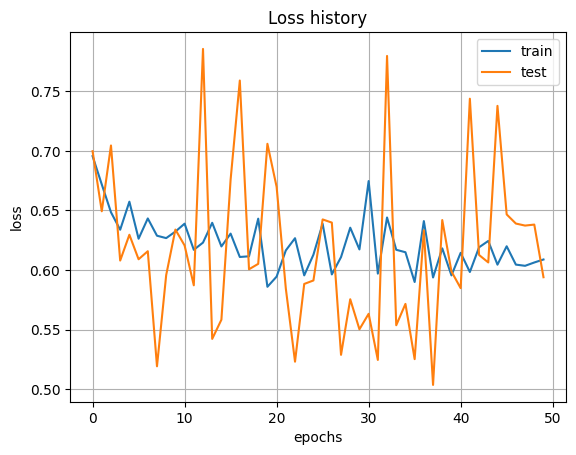

In [ ]:
plt.title('Loss history')
plt.grid(True)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.plot(loss_train, label='train')
plt.plot(loss_test, label='test')
plt.legend()
plt.show()

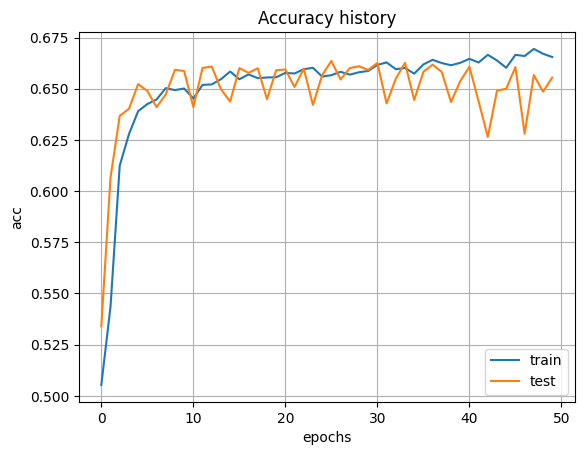

In [ ]:
plt.title('Accuracy history')
plt.grid(True)
plt.ylabel('acc')
plt.xlabel('epochs')
plt.plot(acc_train, label='train')
plt.plot(acc_test, label='test')
plt.legend()
plt.show()

## Save model

In [ ]:
torch.save(model_rnn, path_to_work_dir + 'torch_model_bin.pth')

## Load model

In [ ]:
pt_model_load = torch.load(path_to_work_dir + "torch_model_bin.pth")

In [290]:
model_cnn = CNN_Text_model(max_words, 1024, 1)
print(model_cnn)

CNN_Text_model(
  (embedding): Embedding(5000, 1024)
  (conv_1d_1): Conv1d(1024, 512, kernel_size=(1,), stride=(1,))
  (conv_1d_2): Conv1d(512, 256, kernel_size=(1,), stride=(1,))
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (dp1): Dropout(p=0.3, inplace=False)
  (dp2): Dropout(p=0.4, inplace=False)
  (dp3): Dropout(p=0.5, inplace=False)
  (global_1d_1): AdaptiveAvgPool1d(output_size=1)
)


In [291]:
# model_optimizer = torch.optim.SGD(model_rnn.parameters(), lr=0.01, momentum=0.1)
model_optimizer = torch.optim.Adam(model_cnn.parameters(), lr=0.0005)
model_loss = nn.BCELoss()

## Learn CNN model

In [292]:
results = NN_Model_Fit(model_cnn, 50, device, train_loader, val_loader, model_optimizer, model_loss)

Epoch [1/50]. Step [59/59]. Loss: 0.69738. Acc: 0.50075. Test loss: 0.69499. Test acc: 0.49462
Epoch [2/50]. Step [59/59]. Loss: 0.69314. Acc: 0.50983. Test loss: 0.68715. Test acc: 0.50554
Epoch [3/50]. Step [59/59]. Loss: 0.70694. Acc: 0.52554. Test loss: 0.72909. Test acc: 0.49846
Epoch [4/50]. Step [59/59]. Loss: 0.65520. Acc: 0.57194. Test loss: 0.71690. Test acc: 0.61444
Epoch [5/50]. Step [59/59]. Loss: 0.70944. Acc: 0.63749. Test loss: 0.60952. Test acc: 0.62136
Epoch [6/50]. Step [59/59]. Loss: 0.62090. Acc: 0.65711. Test loss: 0.65584. Test acc: 0.62345
Epoch [7/50]. Step [59/59]. Loss: 0.58181. Acc: 0.67244. Test loss: 0.36173. Test acc: 0.65688
Epoch [8/50]. Step [59/59]. Loss: 0.58602. Acc: 0.68910. Test loss: 0.61644. Test acc: 0.67598
Epoch [9/50]. Step [59/59]. Loss: 0.58058. Acc: 0.68102. Test loss: 0.82369. Test acc: 0.66772
Epoch [10/50]. Step [59/59]. Loss: 0.54047. Acc: 0.70748. Test loss: 0.61321. Test acc: 0.68573
Epoch [11/50]. Step [59/59]. Loss: 0.60459. Acc: 

## Visualisation results

In [293]:
loss_train = results['train_loss']
loss_test = results['test_loss']
acc_train = results['train_acc']
acc_test = results['test_acc']

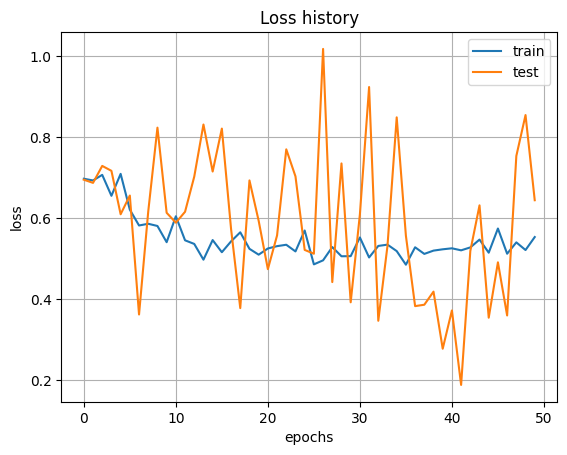

In [294]:
plt.title('Loss history')
plt.grid(True)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.plot(loss_train, label='train')
plt.plot(loss_test, label='test')
plt.legend()
plt.show()

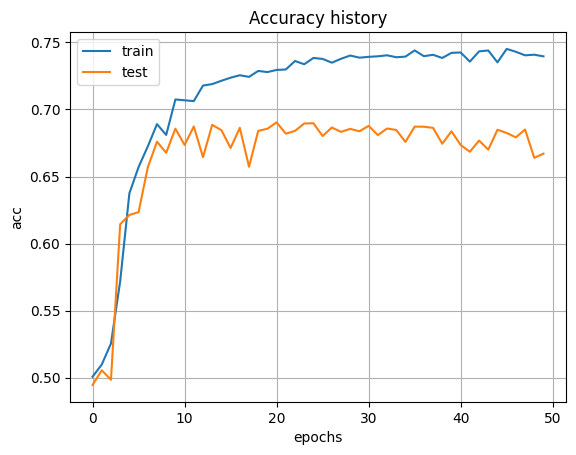

In [295]:
plt.title('Accuracy history')
plt.grid(True)
plt.ylabel('acc')
plt.xlabel('epochs')
plt.plot(acc_train, label='train')
plt.plot(acc_test, label='test')
plt.legend()
plt.show()

## Save model

In [298]:
torch.save(model_cnn, path_to_work_dir + 'torch_model_bin_2.pth')

## Load model

In [299]:
pt_model_load = torch.load(path_to_work_dir + "torch_model_bin_2.pth")

# Conclusion

По результатам тестирования двух моделей RNN и CNN ориентируясь на показатель accuracy можно выделить модель CNN как наиболее выгодную, так как точность модели на тестовых данных выше. Для RNN средний показатель составляет 0.65, для CNN - 0.675